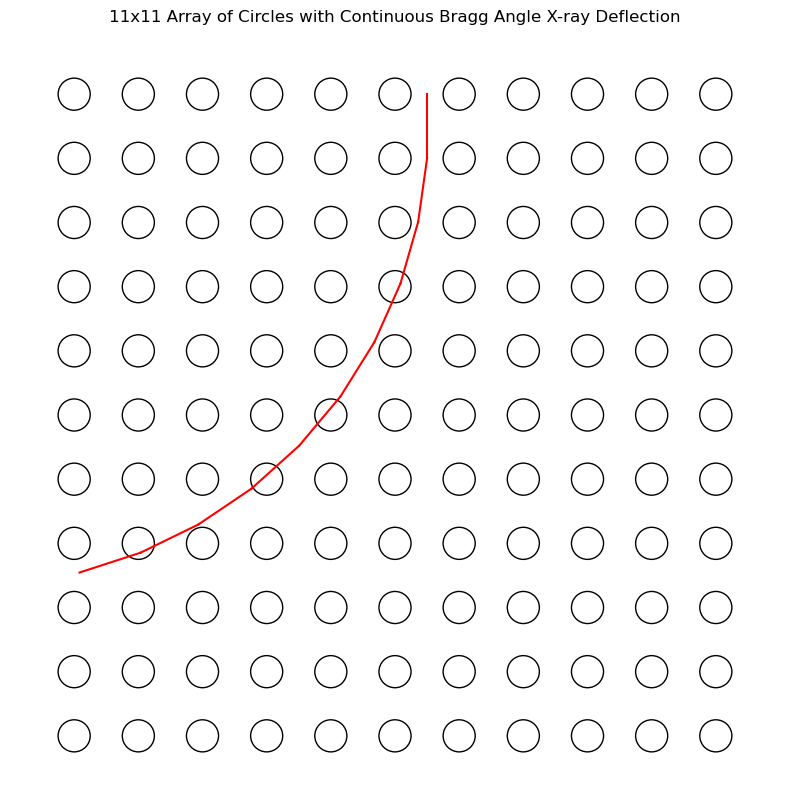

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_circle(ax, x, y, radius=0.05):
    circle = patches.Circle((x, y), radius, edgecolor='black', facecolor='none', linewidth=1)
    ax.add_patch(circle)

def draw_xray_path(ax, start_x, start_y, angle, length):
    end_x = start_x + length * np.cos(np.radians(angle))
    end_y = start_y + length * np.sin(np.radians(angle))  # Positive because we're moving up
    ax.plot([start_x, end_x], [start_y, end_y], 'r-')
    return end_x, end_y

def draw_circle_array_with_continuous_deflection(rows=11, cols=11, spacing=0.2, bragg_angle=4):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw the array of circles
    for j in range(rows):
        for i in range(cols):
            x = i * spacing
            y = (rows - 1 - j) * spacing
            draw_circle(ax, x, y)
    
    # Initial position and angle for the X-ray beam
    start_x = cols * spacing / 2  # Start at the center of the top row
    start_y = (rows - 1) * spacing
    current_angle = -90  # Initial direction is downwards

    # Plot the beam path through the array
    for j in range(rows - 1):
        end_x, end_y = draw_xray_path(ax, start_x, start_y, current_angle, spacing)
        start_x, start_y = end_x, end_y
        current_angle = current_angle - 2 * bragg_angle  # Update angle for next deflection
    
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-spacing, (cols - 1) * spacing + spacing)
    ax.set_ylim(-spacing, (rows - 1) * spacing + spacing)
    ax.axis('off')
    plt.title('11x11 Array of Circles with Continuous Bragg Angle X-ray Deflection')
    plt.show()

# Run the function to draw the array with continuous deflection
draw_circle_array_with_continuous_deflection()


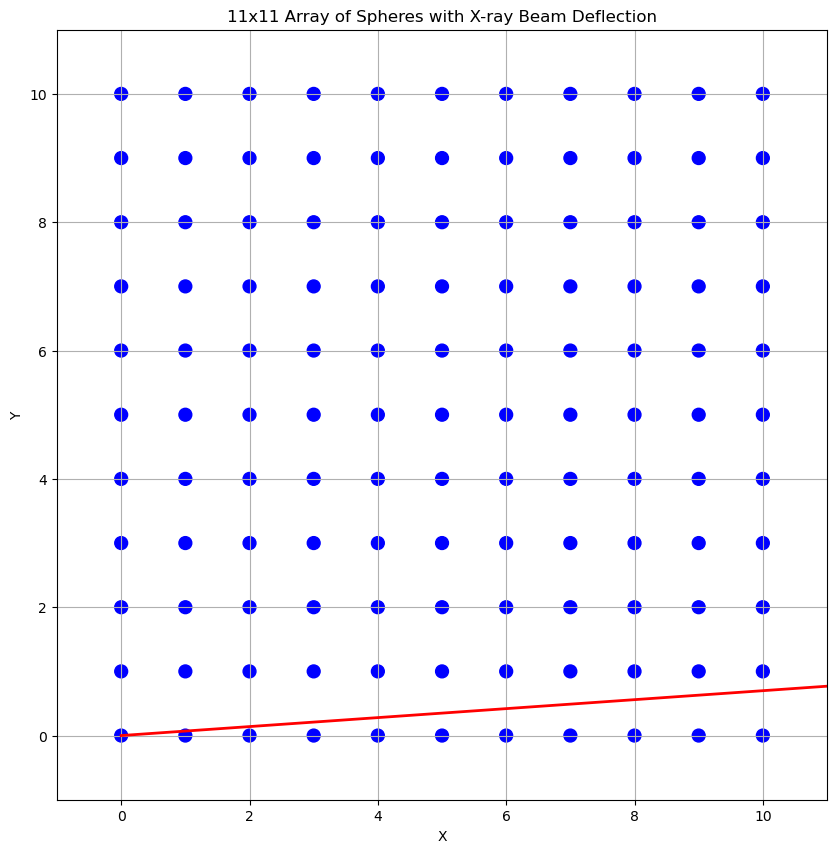

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_spheres = 11
spacing = 1.0
bragg_angle_deg = 4.0
bragg_angle_rad = np.deg2rad(bragg_angle_deg)

# Generate coordinates for spheres
x = np.arange(num_spheres) * spacing
y = np.arange(num_spheres) * spacing
X, Y = np.meshgrid(x, y)
spheres = np.c_[X.ravel(), Y.ravel()]

# Beam parameters
beam_start = np.array([0, 0])
beam_direction = np.array([1, np.tan(bragg_angle_rad)])
beam_end = beam_start + beam_direction * num_spheres

# Plot spheres and beam
fig, ax = plt.subplots(figsize=(10, 10))

# Plot spheres
for (i, j) in spheres:
    circle = plt.Circle((i, j), 0.1, color='blue', fill=True)
    ax.add_artist(circle)

# Plot beam
ax.plot([beam_start[0], beam_end[0]], [beam_start[1], beam_end[1]], color='red', linewidth=2)

# Set plot limits and labels
ax.set_xlim(-1, num_spheres)
ax.set_ylim(-1, num_spheres)
ax.set_aspect('equal')
ax.set_title('11x11 Array of Spheres with X-ray Beam Deflection')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.grid(True)
plt.show()


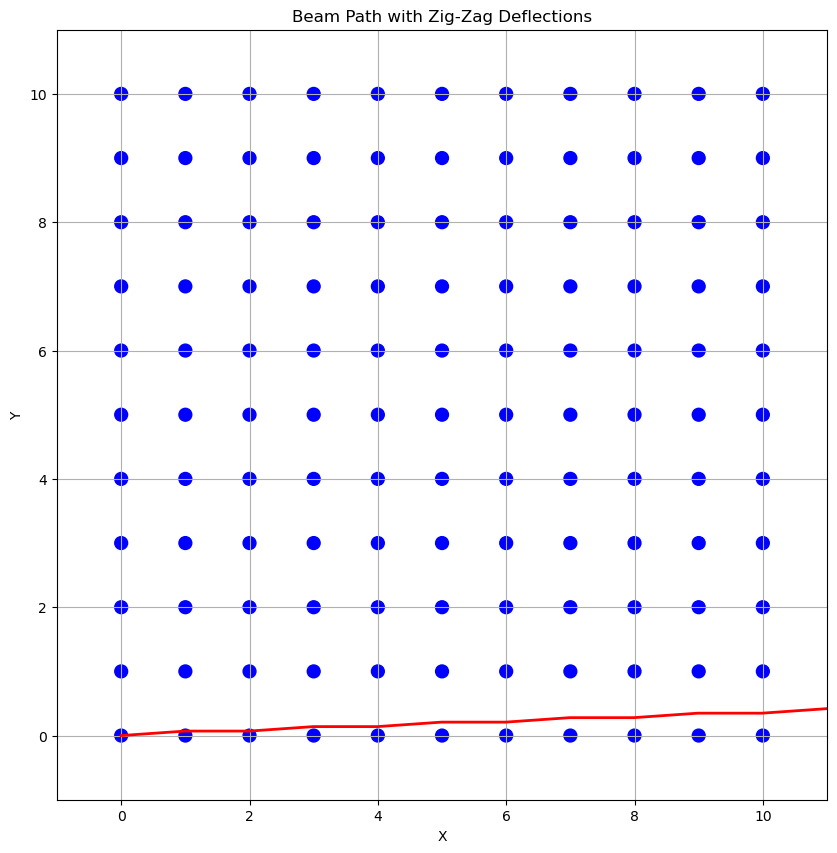

In [47]:
def plot_beam_path(binary_pattern):
    # Generate coordinates for spheres
    num_spheres = 11
    spacing = 1.0
    bragg_angle_deg = 4.0
    bragg_angle_rad = np.deg2rad(bragg_angle_deg)

    x = np.arange(num_spheres) * spacing
    y = np.arange(num_spheres) * spacing
    X, Y = np.meshgrid(x, y)
    spheres = np.c_[X.ravel(), Y.ravel()]

    # Beam parameters
    beam_start = np.array([0, 0], dtype=float)
    beam_position = beam_start.copy()
    beam_path_x = [beam_position[0]]
    beam_path_y = [beam_position[1]]
    direction = np.array([1, 0], dtype=float)  # Initial direction is to the right

    # Process each reflection based on the binary pattern
    for i in range(num_spheres):
        angle = bragg_angle_rad if binary_pattern[i] == '1' else -bragg_angle_rad
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        direction = rotation_matrix.dot(direction)
        beam_position += direction * spacing
        beam_path_x.append(beam_position[0])
        beam_path_y.append(beam_position[1])

    # Plot spheres and beam path
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot spheres
    for (i, j) in spheres:
        circle = plt.Circle((i, j), 0.1, color='blue', fill=True)
        ax.add_artist(circle)

    # Plot beam path
    ax.plot(beam_path_x, beam_path_y, color='red', linewidth=2)

    # Set plot limits and labels
    ax.set_xlim(-1, num_spheres)
    ax.set_ylim(-1, num_spheres)
    ax.set_aspect('equal')
    ax.set_title('Beam Path with Zig-Zag Deflections')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.grid(True)
    plt.show()

# Example usage
binary_pattern = "10101010101"  # Example binary pattern
plot_beam_path(binary_pattern)
